<a href="https://colab.research.google.com/github/simran-padam/WorldHappinessPrediction/blob/main/WorldHappinessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## World Happiness Classification Competition

##**Set up**## 

In [ ]:
#install aimodelshare library
%%capture 

! pip install aimodelshare --upgrade

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/world_happiness_competition_data-repository:latest') 


Data downloaded successfully.


## 1. **Data** 

In [ ]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


In [ ]:
y_train_lab = pd.DataFrame(y_train_labels)
y_train_lab.columns = ["Target"] 

y_train_lab.loc[y_train_lab['Target'] == "Very High", "Target_ind"] = 1
y_train_lab.loc[y_train_lab['Target'] == "High", "Target_ind"] = 2
y_train_lab.loc[y_train_lab['Target'] == "Average", "Target_ind"] = 3
y_train_lab.loc[y_train_lab['Target'] == "Low", "Target_ind"] = 4
y_train_lab.loc[y_train_lab['Target'] == "Very Low", "Target_ind"] = 5

y_train_lab['Target_ind'] = y_train_lab['Target_ind'].astype(int)

 ## 2. **Preprocess data using Sklearn Column Transformer**


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(104, 26)

In [ ]:
full_data= pd.merge(X_train, y_train_lab, left_index=True, right_index=True)

In [ ]:
full_data.loc[2:4,:]

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Target,Target_ind
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000,Low,4
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111,High,2
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000,Very High,1


### Q1. <font color = "red">  Bivariate Analysis </font>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns 

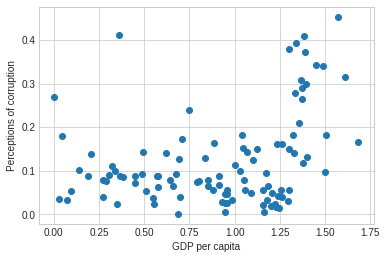

In [ ]:
plt.scatter(full_data['GDP per capita'], full_data['Perceptions of corruption'])
plt.xlabel('GDP per capita')
plt.ylabel('Perceptions of corruption');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


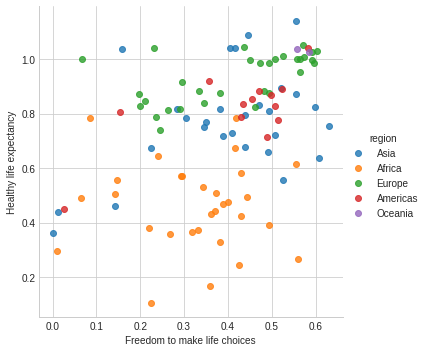

In [ ]:
#plt.scatter(full_data['Social support'], full_data['Perceptions of corruption'])
#plt.xlabel('Social support')
#plt.ylabel('Perceptions of corruption');

sns.lmplot('Freedom to make life choices','Healthy life expectancy', data=full_data, hue='region', fit_reg=False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


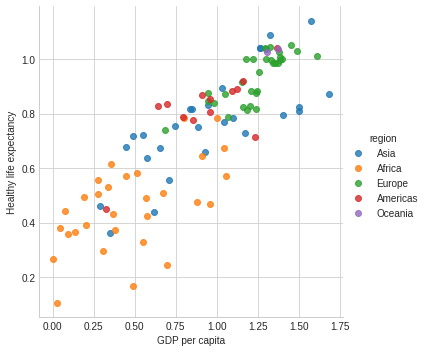

In [ ]:
sns.lmplot('GDP per capita','Healthy life expectancy', data=full_data, hue='region', fit_reg=False)

plt.show()

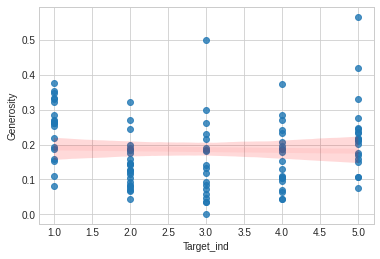

In [ ]:
sns.regplot(x=full_data['Target_ind'], y=full_data['Generosity'], line_kws={"color":"r","alpha":0.05,"lw":5})
plt.show()

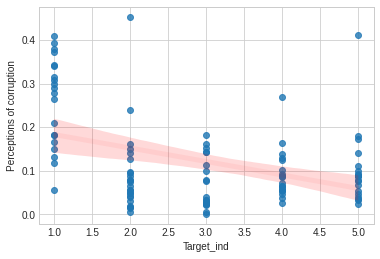

In [ ]:
sns.regplot(x=full_data['Target_ind'], y=full_data['Perceptions of corruption'], line_kws={"color":"r","alpha":0.05,"lw":5})
plt.show()

Summary:


*   The relationship between GDP per capita and perception of corruption is within the same range for lower levels of GDP, however, the perception is varying a lot for higher level of GDP - there is a sudden steep 
*   There is no relationship seen between freedon to make choices and helath life expectancy. 
* Linear relationship between GDP per capita and Health life expectancy
* No relationship between Happiness score and Generosity level - which is an Interesting thought
* Perception of corruption is declining with rising happiness score, result is intuitive





### Q2. <font color = "red">  Feature predicition </font>

In [ ]:
full_data[numeric_features].head(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
0,1.403,1.357,0.795,0.439,0.080,0.132,173.0
1,0.886,0.666,0.752,0.346,0.043,0.164,18.0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(full_data[numeric_features], full_data.iloc[:,12:13])
print(clf.feature_importances_ )         

[0.20182082 0.15043761 0.15441467 0.12144967 0.08848753 0.14309193
 0.14029776]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## Results: 

GDP per capita, Social Support, Health life expectancy, Perceptions of 
corruption are the important features based on the result of tree based feature selection. 

### Q3. <font color = "red">  Model Iterations  </font>

**Random** **Forest** **Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=120, max_depth=5, min_samples_split = 3)
model_1.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_1.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9615384615384616

In [ ]:
# Save preprocessor function to local "preprocessor.zip" file
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

### Submit to competition 

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://c3maq947kb.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted values
prediction_labels = model_1.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_1.onnx",
                                 preprocessor_filepath="preprocessor.zip", 
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 398

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model_2 = GradientBoostingClassifier(n_estimators=27, learning_rate=0.09,
    max_depth=2, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_2.score(preprocessor(X_train), y_train_labels)

0.9711538461538461

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted values
prediction_labels = model_2.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 400

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


**Neural Network**

In [ ]:
# Or you can experiment with deep learning models: 

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Flatten())
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.1))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 32,
               epochs = 20, validation_split=0.20)  

Epoch 1/20
3/3 [==============================] - 4s 137ms/step - loss: 1.5940 - accuracy: 0.1325 - val_loss: 1.5524 - val_accuracy: 0.2857
Epoch 2/20
3/3 [==============================] - 0s 18ms/step - loss: 1.5161 - accuracy: 0.3373 - val_loss: 1.4958 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 1.4321 - accuracy: 0.5060 - val_loss: 1.4365 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 0s 18ms/step - loss: 1.3756 - accuracy: 0.4940 - val_loss: 1.3760 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 0s 19ms/step - loss: 1.3038 - accuracy: 0.5422 - val_loss: 1.3162 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 1.2427 - accuracy: 0.5542 - val_loss: 1.2628 - val_accuracy: 0.3810
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 1.1700 - accuracy: 0.5181 - val_loss: 1.2151 - val_accuracy: 0.4286
Epoch 8/20
3/3 [==========

In [ ]:

from aimodelshare.aimsonnx import model_to_onnx

keras_onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("keras_onnx_model.onnx", "wb") as f:
    f.write(keras_onnx_model.SerializeToString())


## 3. **Submit best model to leaderboard**

In [ ]:
# Submitting the keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
#prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
#prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
#mycompetition.submit_model(model_filepath = "model_2.onnx",
#                                 preprocessor_filepath="preprocessor.zip",
#                                prediction_submission=prediction_labels)

In [ ]:
# Submitting the keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model  to Competition Leaderboard
mycompetition.submit_model(model_filepath = "keras_onnx_model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 401

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289
